In [1]:
import pandas as pd
df = pd.read_excel('C:/Users/sarnowsk/Downloads/FY23_Q1_US_Store_sales_20230215.xlsx')
df.head(2)
df.describe()

,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate
count,1898.000000,1.898000e+03,1.898000e+03,1898.000000
mean,314.694942,1.182509e+05,8.808894e+04,0.153284
std,1415.885653,4.810324e+05,3.158621e+05,0.127719
min,1.000000,1.599000e+01,1.098000e+01,0.000000
25%,10.000000,2.665000e+03,2.242175e+03,0.016232
50%,37.000000,1.375856e+04,1.123917e+04,0.160517
75%,151.000000,7.034068e+04,5.695608e+04,0.262232
max,19364.000000,1.138147e+07,7.017241e+06,0.694830


In [2]:
df.sort_values(by=['category', 'week_end_date_sun'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(3)

,country,sales_source,order_type,product_line_code,category,sub_category,week_end_date_sun,business_group,fiscal_quarter,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate
0,US,Website,Business,M5,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,79,136781.17,95254.23,0.303601
1,US,Call Center,Consumer,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,218,216855.27,162378.62,0.251212
2,US,Call Center,Consumer,KV,CONSUMER,Consumer Notebooks,2022-11-13,PSG,FY23-Q1,386,341311.78,226306.34,0.336951


In [3]:
df['ActlPrc'] = (df['revenue_after_discount_usd'] / df['units'])
df.head(5)

,country,sales_source,order_type,product_line_code,category,sub_category,week_end_date_sun,business_group,fiscal_quarter,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate,ActlPrc
0,US,Website,Business,M5,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,79,136781.17,95254.23,0.303601,1205.749747
1,US,Call Center,Consumer,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,218,216855.27,162378.62,0.251212,744.856055
2,US,Call Center,Consumer,KV,CONSUMER,Consumer Notebooks,2022-11-13,PSG,FY23-Q1,386,341311.78,226306.34,0.336951,586.285855
3,US,Call Center,Business,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,127,121547.73,93380.29,0.231740,735.277874
4,US,Website,Business,M8,CONSUMER,Consumer Notebooks,2022-11-13,PSG,FY23-Q1,183,247843.38,192809.34,0.222052,1053.602951


In [4]:
# convert both units and price to natural logs 
import numpy as np
df['ln_units'] = np.log(df['units'].replace(0, np.nan))
df['ln_actlprc'] = np.log(df['ActlPrc'].replace(0, np.nan))
df.head(2)

,country,sales_source,order_type,product_line_code,category,sub_category,week_end_date_sun,business_group,fiscal_quarter,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate,ActlPrc,ln_units,ln_actlprc
0,US,Website,Business,M5,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,79,136781.17,95254.23,0.303601,1205.749747,4.369448,7.094857
1,US,Call Center,Consumer,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,218,216855.27,162378.62,0.251212,744.856055,5.384495,6.613191


In [7]:
%pip install pandas==1.5.3 

In [10]:
import statsmodels.formula.api as sm 

In [26]:
md = sm.mixedlm("ln_units ~ ln_actlprc", df, groups=df["category"]).fit 

In [27]:
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ln_units  
No. Observations: 1898    Method:             REML      
No. Groups:       3       Scale:              3.2290    
Min. group size:  430     Log-Likelihood:     -3813.6047
Max. group size:  880     Converged:          Yes       
Mean group size:  632.7                                 
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   3.456     0.609  5.680  0.000   2.264   4.649
ln_actlprc  0.075     0.063  1.194  0.232  -0.048   0.198
Group Var   0.755     0.423                              



In [15]:
df['units_1'] = (df['units'] + 0.001)
df['ActlPrc_1'] = (df['ActlPrc'] + 0.001)
df.head(3)

,country,sales_source,order_type,product_line_code,category,sub_category,week_end_date_sun,business_group,fiscal_quarter,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate,ActlPrc,ln_units,ln_actlprc,units_1,ActlPrc_1
0,US,Website,Business,M5,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,79,136781.17,95254.23,0.303601,1205.749747,4.369448,7.094857,79.001,1205.750747
1,US,Call Center,Consumer,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,218,216855.27,162378.62,0.251212,744.856055,5.384495,6.613191,218.001,744.857055
2,US,Call Center,Consumer,KV,CONSUMER,Consumer Notebooks,2022-11-13,PSG,FY23-Q1,386,341311.78,226306.34,0.336951,586.285855,5.955837,6.373807,386.001,586.286855


In [17]:
# convert both units and price to natural logs 
import numpy as np
df['ln_units_1'] = np.log(df['units_1'].replace(0, np.nan))
df['ln_actlprc'] = np.log(df['ActlPrc_1'].replace(0, np.nan))
df.head(2)

,country,sales_source,order_type,product_line_code,category,sub_category,week_end_date_sun,business_group,fiscal_quarter,units,revenue_before_discount_usd,revenue_after_discount_usd,pct_rebate,ActlPrc,ln_units,ln_actlprc,units_1,ActlPrc_1,ln_units_1
0,US,Website,Business,M5,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,79,136781.17,95254.23,0.303601,1205.749747,4.369448,7.094858,79.001,1205.750747,4.369461
1,US,Call Center,Consumer,1M,CONSUMER,Consumer Desktops,2022-11-13,PSG,FY23-Q1,218,216855.27,162378.62,0.251212,744.856055,5.384495,6.613192,218.001,744.857055,5.384500


In [42]:
## Data is read in and transformed - now to do some modeling

In [18]:
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [19]:
X = df.iloc[:, 14].values.reshape(-1, 1)  # values converts it into a numpy array
print(X)

[[4.36944785]
 [5.38449506]
 [5.95583737]
 ...
 [4.61512052]
 [4.60517019]
 [5.88332239]]


In [20]:
Y = df.iloc[:, 15].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
print(Y)

[[7.09485768]
 [6.61319233]
 [6.37380918]
 ...
 [3.63801363]
 [5.5042879 ]
 [4.64216266]]


In [21]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [22]:
print(linear_regressor.coef_)

[[0.02099733]]


In [23]:
print(linear_regressor.intercept_)

[5.49736183]


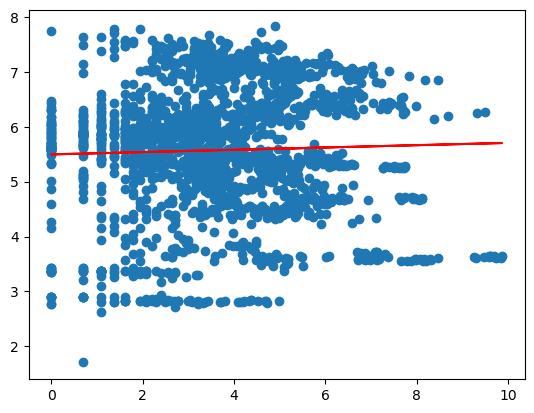

In [25]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
# Random Intercept Model w/out Interaction Term

model = smf.mixedlm("weight ~ litsize + C(treatment) + C(sex, Treatment('Male'))", df, groups= "litter").fit()

model.summary()